## Eq. of motion


Markert et al. 2001
$$
\ddot{X} + 2D\dot{X} + X = A_0 P(t)
$$

$$
P(t) = \cos \varphi(t)
$$

$$\varphi(t) = \frac{\alpha}{2}t^2 + \eta_0 t + \beta$$


Envelope curve is $Q(t) = B_1 w(v_1(t)) + B_2 w(v_2(t)) + C_1 e^{v_1^2(t) - v_1(t)^2} + C_2 e^{v_2^2(t) - v_2(t)^2}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz
def w(x):
    return wofz(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$w(X)$')

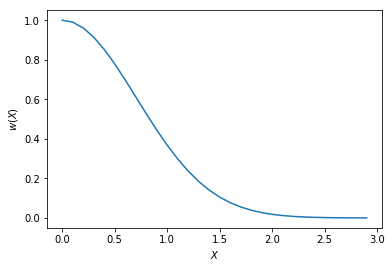

In [3]:
x = np.arange(0., 3., 0.1)
plt.plot(x, w(x), '-')
plt.xlabel('$X$')
plt.ylabel('$w(X)$')

In [53]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.002
alpha = 1e-5
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

In [13]:
def v1(t):
    prefac = -(1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda1
    return prefac*linear

def v2(t):
    prefac = (1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda2
    return prefac*linear



In [14]:
B1 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0
B2 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0

C1 = (lambda2*ipos - ivelocity)*np.exp(-1j*beta)/(lambda2-lambda1) - B1*w(v1(0))
C2 = (lambda1*ipos - ivelocity)*np.exp(-1j*beta)/(lambda1-lambda2) - B2*w(v2(0))



In [23]:
def Q(t):
    return B1*w(v1(t)) + B2*w(v2(t)) + C1*np.exp(v1(0)**2 - v1(t)**2) + C2*np.exp(v2(0)**2 - v2(t)**2)

In [30]:
def IF(t):
    return alpha*t + eta0

def omega(t):
    return (alpha/2.)*t + eta0

"Instantaneous frequency:"

$$
\eta \equiv \frac{\text{d}\varphi }{\text{d}t} = \alpha t + \eta_0
$$

$$
\omega \equiv \frac{\varphi }{t} = \frac{\alpha}{2}t + \eta_0
$$



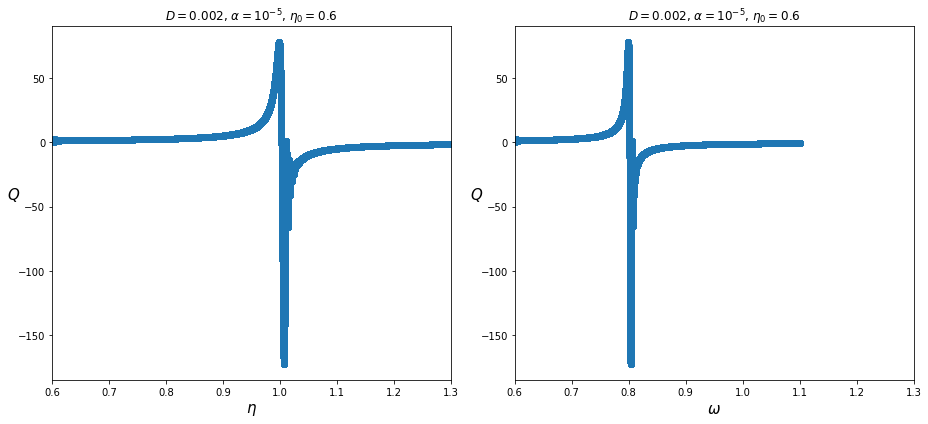

In [54]:
x = np.arange(0., 1/alpha, 0.1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
ax1.plot(IF(x), Q(x), '-o')
ax1.set_title(r"$D = 0.002$, $\alpha = 10^{-5}$, $\eta_0 = 0.6$")
ax1.set_xlabel('$\eta$', fontsize=15)
ax1.set_ylabel('$Q$', fontsize=15, rotation = 0)
ax1.set_xlim(0.6, 1.3)

ax2.plot(omega(x), Q(x), '-o')
ax2.set_title(r"$D = 0.002$, $\alpha = 10^{-5}$, $\eta_0 = 0.6$")
ax2.set_xlabel('$\omega$', fontsize=15)
ax2.set_ylabel('$Q$', fontsize=15, rotation = 0)
ax2.set_xlim(0.6, 1.3)

f.tight_layout()


In [48]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.02
alpha = 1e-2
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

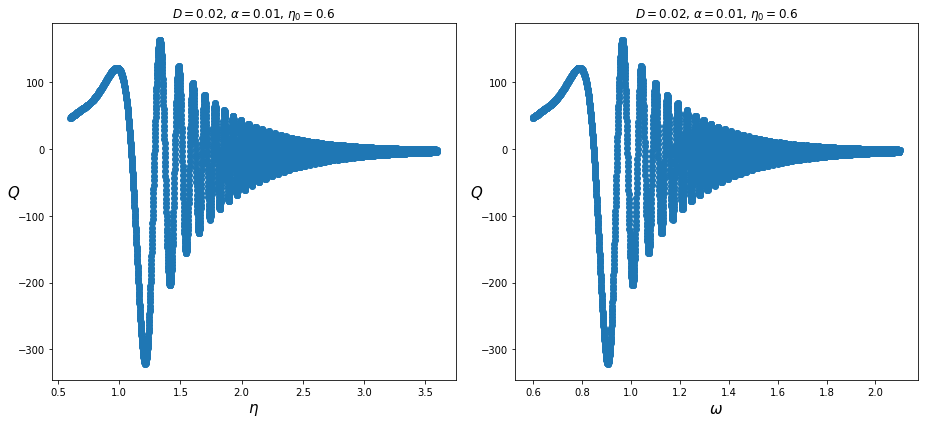

In [51]:
x = np.arange(0., 3/alpha, 0.1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
ax1.plot(IF(x), Q(x), '-o')
ax1.set_title(r"$D = 0.02$, $\alpha = 0.01$, $\eta_0 = 0.6$")
ax1.set_xlabel('$\eta$', fontsize=15)
ax1.set_ylabel('$Q$', fontsize=15, rotation = 0)

ax2.plot(omega(x), Q(x), '-o')
ax2.set_title(r"$D = 0.02$, $\alpha = 0.01$, $\eta_0 = 0.6$")
ax2.set_xlabel('$\omega$', fontsize=15)
ax2.set_ylabel('$Q$', fontsize=15, rotation = 0)

f.tight_layout()